In [273]:
%matplotlib notebook
from farris_symmetry import *

In [2]:

def fundamentalCellDisplay(fundamentalDict, resx, resy):

    extremePoints = [0., lattice_vector_1, lattice_vector_2, lattice_vector_1 + lattice_vector_2]
    minx = min([i.real for i in extremePoints])
    maxx = max([i.real for i in extremePoints])
    miny = min([i.imag for i in extremePoints])
    maxy = max([i.imag for i in extremePoints])
    
    gap = max([maxy - miny, maxx - minx])
    maxx = minx + gap
    maxy = miny + gap
    
    imOut = np.zeros((resy, resx, 3), dtype='uint8')
    for key,value in fundamentalDict.items():
        z = ((lattice_vector_1 * key[0]) + (lattice_vector_2 * key[1])) / numStep
        x = z.real
        y = z.imag
        
        i = int(((x - minx)/(maxx-minx)) * (resx-1))
        j = int(((y - miny)/(maxy-miny)) * (resy-1))
        imOut[resy - j - 1,i,:] = value
     
    display(Image.fromarray(imOut))

## Load the colorwheel

file0001625591306.jpg


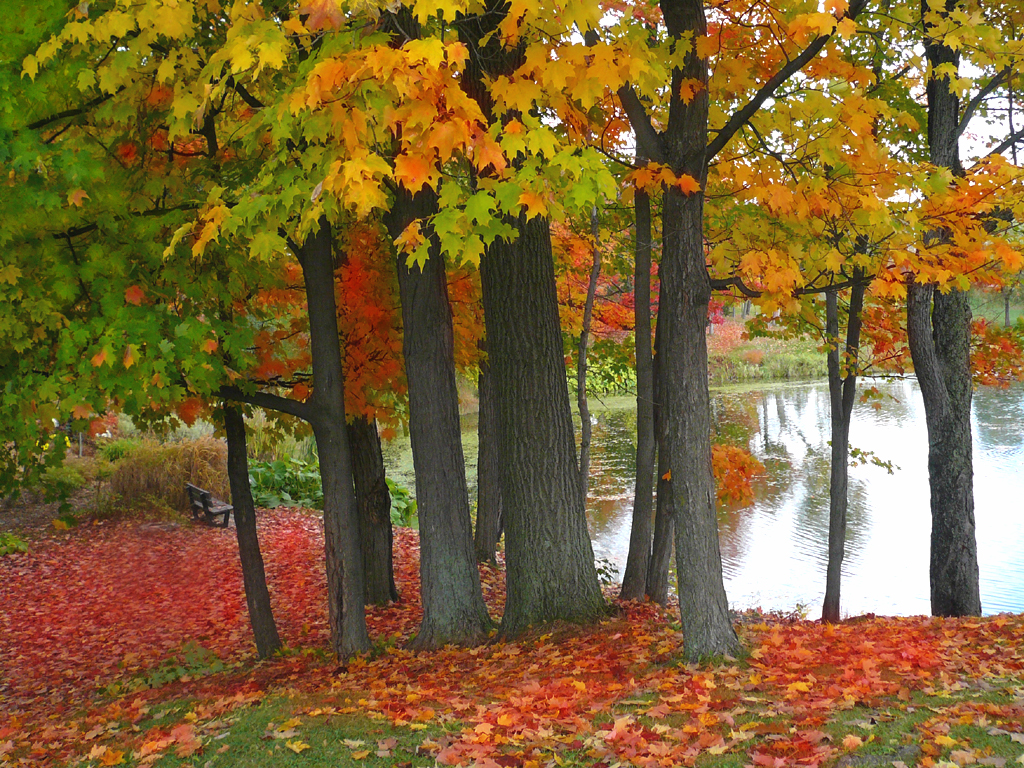

In [250]:
imageIndex = 'random'

colorWheel, imageName = colorWheelGet(imageList,index = imageIndex)
print imageName
display(Image.fromarray(colorWheel))

## Choose your symmetry!

In [262]:
numStep = 1000 # number of steps along the two lattice vectors
numCPU = 4 # number of CPUs to use with multiprocessing

#groupType = 'p4g'
groupType = randomGroupGet()
numSampleCoeff = 4
coefficientFunction = exponentialDist(1.0)
nmMagnitudeFunction = geometricDist(.6)

latticeType = latticeTypeFromGroup(groupType)
if latticeType == 'general':
    latticeData = .5 + 1j 
elif latticeType == 'rhombic':
    latticeData = .25
elif latticeType == 'rectangular':
    latticeData = 2
else:
    latticeData = None

myF, lattice_vector_1, lattice_vector_2 = functionAndLatticeGet(latticeType, latticeData)
nmDict = nmDictRandom(groupType, numSampleCoeff, coefficientFunction, nmMagnitudeFunction)

print 'Group: ' + groupType
print 'lattice type: ' + latticeType
print "lattice_vector_1: " + str(lattice_vector_1)
print "lattice_vector_2: " + str(lattice_vector_2)
print "nmDict: " + str(nmDict)

Group: p6
lattice type: hexagonal
lattice_vector_1: 1.0
lattice_vector_2: (-0.5+0.866025403784j)
nmDict: {(-1, 1): (0.46593635474358641-0.42782831532707677j), (-2, -2): (-0.048178461323122722-0.22534635899894967j), (-1, -1): (-0.37575156147677913-1.2434203198611624j), (2, 4): (-0.058940781176954976-0.5155484087124178j), (-2, -4): (-0.058940781176954976-0.5155484087124178j), (2, 2): (-0.048178461323122722-0.22534635899894967j), (1, -1): (0.46593635474358641-0.42782831532707677j), (1, 1): (-0.37575156147677913-1.2434203198611624j)}


## Calculate the complex function values on the fundamental cell grid

In [263]:
v = np.linspace(0,1,numStep)

if numStep <=200 or numCPU==1:
    print "computing"
    gridApply = dict([latticeEval((i,x,j,y,myF,nmDict,lattice_vector_1,lattice_vector_2)) for i,x in enumerate(v) for j,y in enumerate(v)])
    print "done computing..."
else:
    pool = Pool(numCPU)
    print "computing..."
    grid = [(i,x,j,y,myF,nmDict,lattice_vector_1,lattice_vector_2) for i,x in enumerate(v) for j,y in enumerate(v)]
    gridApply = dict(pool.map(latticeEval,grid))
    pool.close()
    print "done computing..."

computing...
done computing...


## Visualize real part of function to detect lack of symmetry and coefficient degeneracies

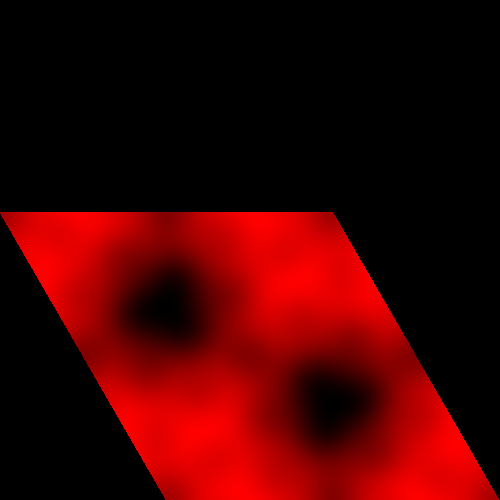

In [264]:
fundamentalRealDict = checkSymmetrySimpleReal(gridApply)
fundamentalCellDisplay(fundamentalRealDict, 500,500)

## Visualize imaginary part of function to detect lack of symmetry and coefficient degeneracies

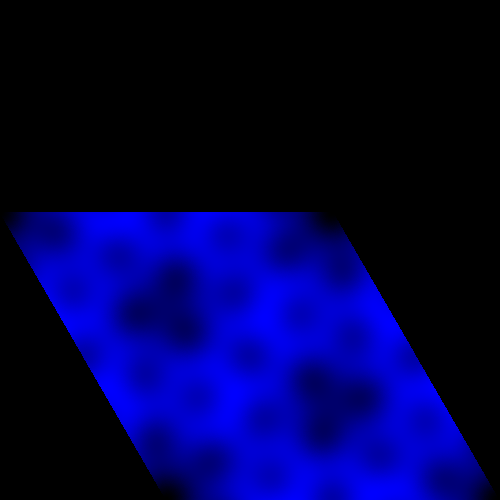

In [265]:
fundamentalImagDict = checkSymmetrySimpleImag(gridApply)
fundamentalCellDisplay(fundamentalImagDict, 500,500)

## Calculate the colors on the fundamental cell grid using the colorwheel

In [266]:
fundamentalColorDict = colorwheelApply(gridApply, colorWheel)

## Here is the fundamental cell using Farris' image colorwheel technique

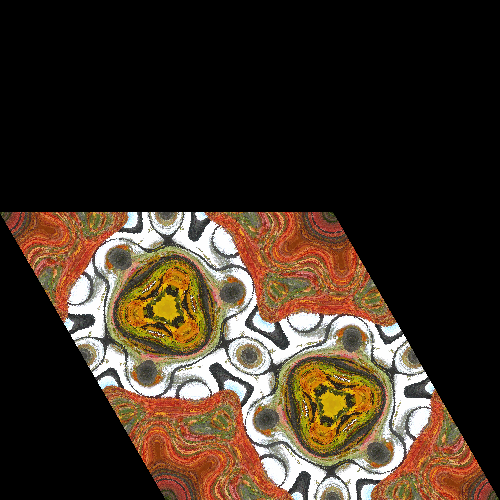

In [267]:
fundamentalCellDisplay(fundamentalColorDict, 500,500)

## Here is a small piece of the wallpaper pattern

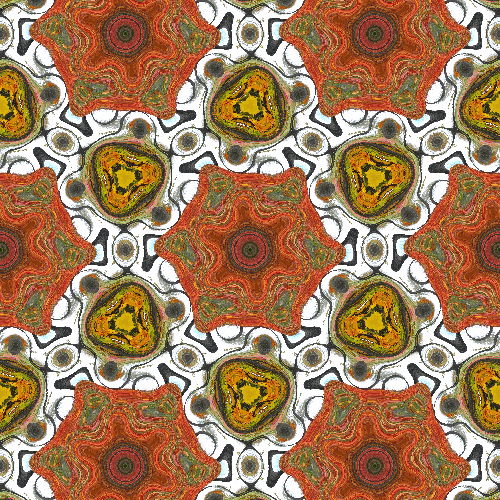

In [268]:
xmin,xmax = -1,1
ymin,ymax = -1,1
resx, resy = 500,500

imOut = tileFundamental(fundamentalColorDict, 
                            numStep, 
                            lattice_vector_1,
                            lattice_vector_2,
                            xmin=xmin, 
                            xmax=xmax, 
                            ymin=ymin, 
                            ymax=ymax, 
                            resx=resx, 
                            resy=resy)
display(Image.fromarray(imOut))

## Here is the fundamental cell using the alternative visualization technique

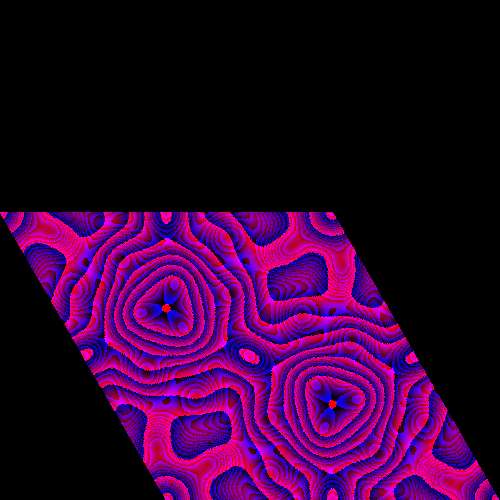

In [269]:
fundamentalSimpleSymDict = checkSymmetrySimple(gridApply)
fundamentalCellDisplay(fundamentalSimpleSymDict, 500,500)

In [274]:
fundamentalSimpleSymDict = symmetryByFunction(gridApply,simpleSymmetryFunction)
fundamentalCellDisplay(fundamentalSimpleSymDict, 500,500)

NameError: name 'symmetryByFunction' is not defined

## Here is a small piece of the wallpaper pattern using alternative visualization

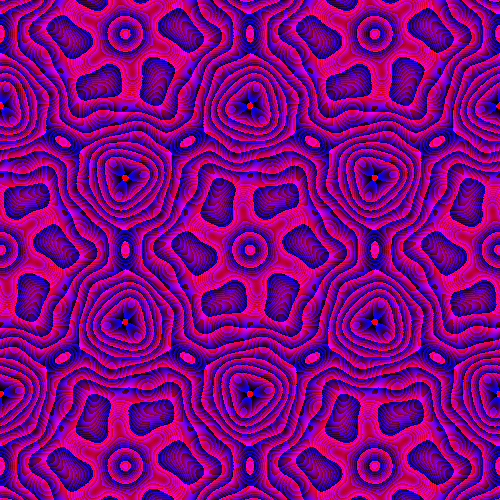

In [270]:
imOut1 = tileFundamental(fundamentalSimpleSymDict, 
                            numStep, 
                            lattice_vector_1,
                            lattice_vector_2,
                            xmin=xmin, 
                            xmax=xmax, 
                            ymin=ymin, 
                            ymax=ymax, 
                            resx=resx, 
                            resy=resy)
display(Image.fromarray(imOut1))

## Iterate.  Use the new wallpaper pattern as a colorwheel with the same specs!

In [271]:
imRecursive = imOut

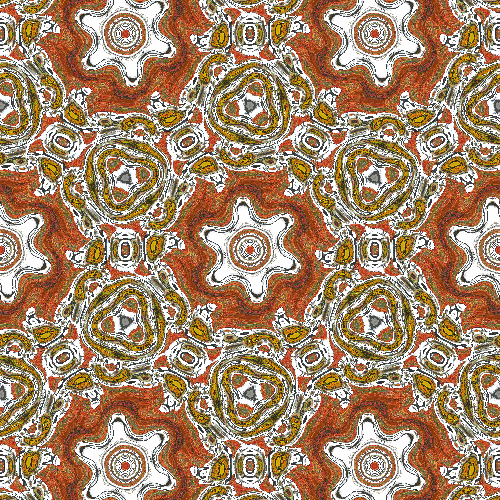

In [272]:
fundamentalColorDict2 = colorwheelApply(gridApply, imRecursive)
imRecursive = tileFundamental(fundamentalColorDict2, 
                            numStep, 
                            lattice_vector_1,
                            lattice_vector_2,
                            xmin=xmin, 
                            xmax=xmax, 
                            ymin=ymin, 
                            ymax=ymax, 
                            resx=resx, 
                            resy=resy)
display(Image.fromarray(imRecursive))